### 회귀 모델
- 지도학습 : 정답데이터 필요
- 회귀 <=> 예측
- > KNN 회귀 : 분류와 동일하게 임의의 데이터의 예측값을 예측하기 위해서 K개의 이웃의 수치데이터를 바탕으로 평균을 내어 예측하는 방법
- > 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 '숫자'를 예측하는 문제
- > 주어진 문제 : petal length로 petal width 예측해보자 

### 라이브러리 불러오기 

In [1]:
# 1. 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 1. 데이터 로드하기

In [2]:
# 2. iris 붓꽃 데이터 로드
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))

<class 'sklearn.utils.Bunch'>


### 2. 데이터 탐색하기 

### 데이터 전처리
- 분류모델은 지도학습으로 **정답**이 반드시 필요함
- 학습을 위한 데이터 준비


In [3]:
# 3. 데이터 준비
# sepal: 꽃받침, petal: 꽃잎
features = iris['data']  # 특징데이터
feature_names = iris['feature_names']

# 데이터프레임으로 만들기
df = pd.DataFrame(features, columns=feature_names)


### 데이터셋을 DataFrame으로 변환
- pandas 사용 

In [4]:
# 기존 데이터에서 sepal 관련 column 제거하기
data = df.drop(columns=['sepal length (cm)', 'sepal width (cm)'])
data.head()

#### Feature Data : Petal length
#### Label Data : Petal width

x = data['petal length (cm)']  # 특징데이터
y = data['petal width (cm)']  # 정답데이터


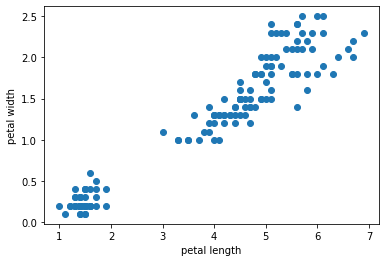

In [5]:
# 데이터 시각화
plt.scatter(x, y)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()


### 데이터 분리 
- train(학습) / test(검증) 데이터 분리하기




In [6]:
print(type(x))
print(type(y))

# pandas => numpy로 변환
x = np.array(x)
y = np.array(y)


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(x_train.shape, x_test.shape) # 75 : 25


(112,) (38,)


scikit-learn 모듈 : 반드시 2차원 배열(행렬)값을 모델의 입력데이터로 사용
- 만약 1차원 배열일 경우, numpy의 reshape()함수 사용하여 변형 

In [8]:
# -1은 신경쓰지말고 그 옆에 있는 숫자만 shape으로 맞춤
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

print(x_train.shape)
print(x_test.shape)


(112, 1)
(38, 1)


### KNN 회귀 모델 생성


In [9]:
# 회귀모델 사용
from sklearn.neighbors import KNeighborsRegressor

# 모델 생성
knr = KNeighborsRegressor()

# 모델 학습
knr.fit(x_train, y_train)


KNeighborsRegressor()

In [10]:
# 모델 성능 평가(test data 입력) => 결정계수 이용

knr.score(x_test, y_test)


0.9466315414430853

### 결정계수
- 회귀선에 각각의 값들이 얼마나 가까운지 측정
- 회귀선이 얼마나 실제값을 잘 예측할 수 있는 지 확인 가능
- 0~1 사이 값을 가짐(1에 가까워질 수록 정확도가 높음)



In [11]:
from sklearn.metrics import mean_absolute_error

pred = knr.predict(x_test)  # 예측값
# 타깃(실제값)과 예측값을 입력해서 평균오차 반환
mae = mean_absolute_error(y_test, pred)
print(mae) # 평균오차(cm)


0.14736842105263157


In [12]:
y_pred = knr.predict(x_test)
print(x_test.shape)  # 38개(test set)를 검증에 사용
print(y_pred)  # 예측 결과(수치 데이터 반환)


(38, 1)
[1.58 0.38 2.12 1.52 1.66 0.18 1.1  1.84 1.52 1.2  1.84 0.2  0.28 0.18
 0.18 1.58 2.12 1.2  1.52 1.96 0.38 1.7  0.38 1.96 2.12 1.92 2.12 2.1
 0.2  0.38 0.24 0.18 1.42 0.38 0.28 1.64 1.52 0.18]


In [13]:
# 꽃잎의 길이가 5.1cm인 경우 폭이 얼마일지 예측
# numpy 배열(샘플 수에 특성 수를 곱한 크기로 만들기), 학습시 사용한 데이터와 동일한 형태 
# 
new_data = np.array([[5.1]])
pred = knr.predict(new_data)
print(pred)  # cm


[1.84]


KNN 회귀
- 테스트하고자 하는 샘플에 근접한 훈련 데이터가 없는 경우, 즉 훈련 셋의 범위를 많이 벗어나는 샘플인 경우 정확하게 예측하기 어려움
- 선형회귀 사용 

### 선형회귀
- 특징이 하나인 경우 어떤 직선을 학습하는 알고리
- 최소제곱법(기본) / 리지, 라소
- 상관분석을 통해서 양의 상관관계, 음의 상관관계가 있을 때만 사용 

> 직선의 방정식 =>  y=ax+b




In [14]:
from sklearn.linear_model import LinearRegression

# 새로운 모델 생성
lr = LinearRegression()

# 모델 학습
lr.fit(x_train, y_train)

# 직선의 방정식에서 a와 b의 값
print(lr.coef_, lr.intercept_)


[0.41384233] -0.3612711451503987


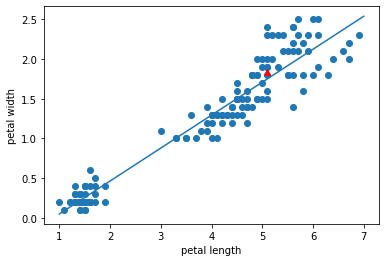

In [15]:
plt.scatter(x, y)
# 범위, 방정식 

plt.scatter(new_data, pred, marker='^', c='r') # 그래프에서 예측하려는 새로운 데이터 표시하기
plt.plot([1, 7], [1*lr.coef_ + lr.intercept_, 7*lr.coef_ + lr.intercept_])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()


In [16]:
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.9218816722386638
0.9398857910361995
